### 1. Introduction

This project tries to predict the bitcoin price from the historical bitcoin price downloaded from Yahoo Finance (https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD) using the popular Time-series algorithm ARMR.


![Time Series Analysis workflow](https://ask.qcloudimg.com/developer-images/article/2546206/syz0dz30f7.png?imageView2/2/w/1620)

### 2. Dataset

In [1]:
from itertools import product


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
df = pd.read_csv('./bitcoin_yahoo.csv')

### 3. Data preprocessing

In [3]:
# date beginning
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
5,2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600
6,2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500
7,2014-09-24,435.751007,436.112000,421.131989,423.204987,423.204987,30627700
8,2014-09-25,423.156006,423.519989,409.467987,411.574005,411.574005,26814400
9,2014-09-26,411.428986,414.937988,400.009003,404.424988,404.424988,21460800


In [4]:
# date end
df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
2703,2022-02-10,44347.800781,45661.171875,43402.808594,43565.113281,43565.113281,32142048537
2704,2022-02-11,43571.128906,43810.832031,42114.539063,42407.937500,42407.937500,26954925781
2705,2022-02-12,42412.300781,42992.550781,41852.574219,42244.468750,42244.468750,18152390304
2706,2022-02-13,42236.566406,42693.054688,41950.941406,42197.515625,42197.515625,14741589015
2707,2022-02-14,42157.398438,42775.777344,41681.957031,42586.917969,42586.917969,20827783012
2708,2022-02-15,42586.464844,44667.218750,42491.035156,44575.203125,44575.203125,22721659051
2709,2022-02-16,44578.277344,44578.277344,43456.691406,43961.859375,43961.859375,19792547657
2710,2022-02-17,43937.070313,44132.972656,40249.371094,40538.011719,40538.011719,26246662813
2711,2022-02-18,40552.132813,40929.152344,39637.617188,40030.976563,40030.976563,23310007704
2712,2022-02-19,40022.132813,40246.027344,40010.867188,40126.429688,40126.429688,22263900160


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2713 non-null   object 
 1   Open       2713 non-null   float64
 2   High       2713 non-null   float64
 3   Low        2713 non-null   float64
 4   Close      2713 non-null   float64
 5   Adj Close  2713 non-null   float64
 6   Volume     2713 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 148.5+ KB


In [6]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2.713000e+03
mean,11311.041069,11614.292482,10975.555057,11323.914637,11323.914637,1.470462e+10
std,16106.428891,16537.390649,15608.572560,16110.365010,16110.365010,2.001627e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,606.396973,609.260986,604.109985,606.718994,606.718994,7.991080e+07
50%,6301.569824,6434.617676,6214.220215,6317.609863,6317.609863,5.098183e+09
75%,10452.399414,10762.644531,10202.387695,10462.259766,10462.259766,2.456992e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [8]:
# convert the column Date to be of type datetime
df.Date = pd.to_datetime(df.Date)
# reset the index to the Date
df.index = df.Date

In [9]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2014-09-17,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [10]:
# drop the useless column Timestamp
df.drop(labels=['Date'], axis=1, inplace=True)

In [11]:
# dataset.dropna(inplace=True)

In [12]:
# d = dataset.convert_dtypes()

### 4. Data EDA

In [13]:
import plotly.graph_objects as go

# OHLC diagram
fig = go.Figure(data=go.Ohlc(x=df.index, open=df.Open, high=df.High, low=df.Low, close=df.Close))
fig.show()

#### Stability Analysis

In [14]:
# difference
df['Close_diff_1'] = df['Close'].diff(1)
df['Close_diff_2'] = df['Close_diff_1'].diff(1)

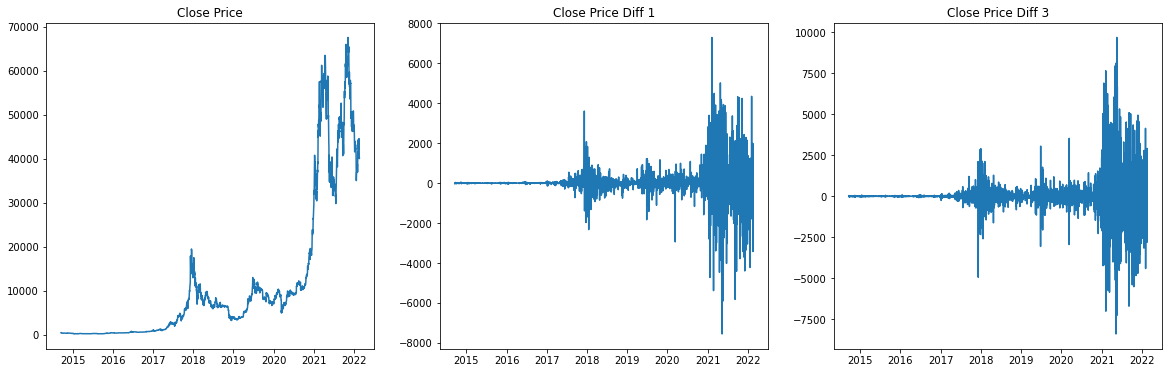

In [15]:
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(131)
ax1.plot(df['Close'])
ax1.set_title('Close Price')
ax2 = fig.add_subplot(132)
ax2.plot(df['Close_diff_1'])
ax2.set_title('Close Price Diff 1')
ax3 = fig.add_subplot(133)
ax3.plot(df['Close_diff_2'])
ax3.set_title('Close Price Diff 3')
plt.show()

In [16]:
# plot the data by day, month, quarter, and year
df_day = df.resample('D').mean()
df_week = df.resample('W').mean()
df_month = df.resample('M').mean()
df_quarter = df.resample('Q-DEC').mean()
df_year = df.resample('A-DEC').mean()

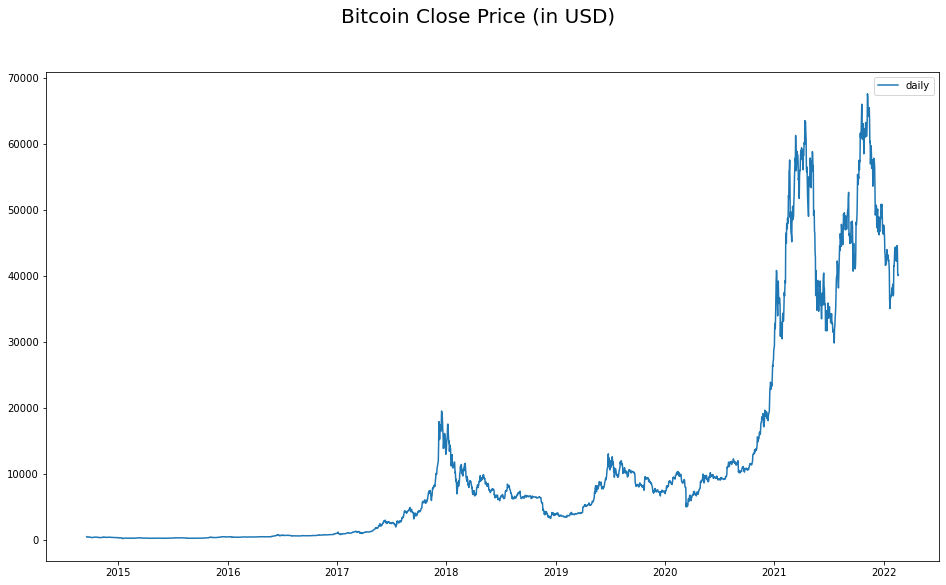

In [17]:
fig = plt.figure(figsize=[16, 9])
plt.suptitle('Bitcoin Close Price (in USD)',  fontsize=20)
plt.subplot()
plt.plot(df_day.Close, '-', label='daily')
plt.legend()

#### smoothness

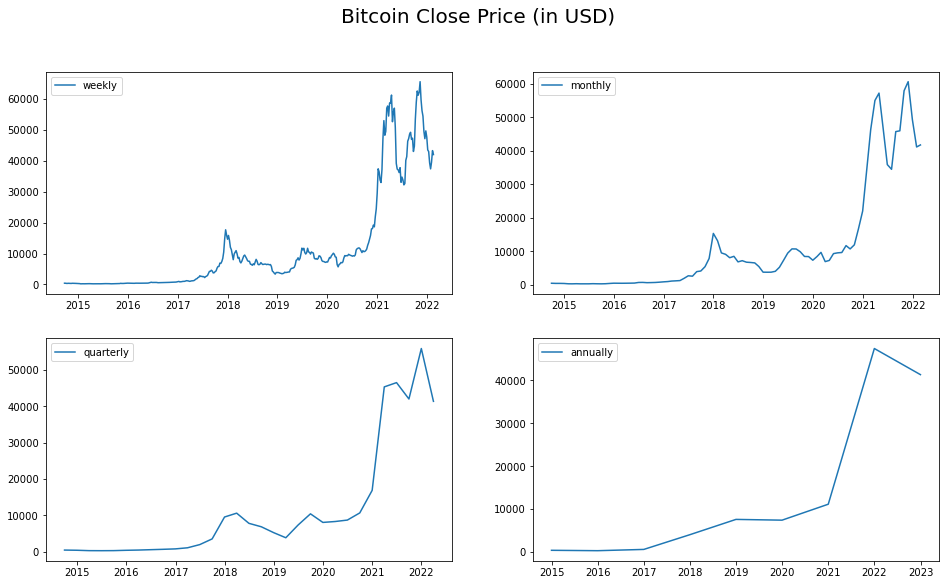

In [18]:
fig = plt.figure(figsize=[16, 9])
plt.suptitle('Bitcoin Close Price (in USD)',  fontsize=20)
plt.subplot(221)
plt.plot(df_week.Close, '-', label='weekly')
plt.legend()
plt.subplot(222)
plt.plot(df_month.Close, '-', label='monthly')
plt.legend()
plt.subplot(223)
plt.plot(df_quarter.Close, '-', label='quarterly')
plt.legend()
plt.subplot(224)
plt.plot(df_year.Close, '-', label='annually')
plt.legend()
plt.show()

In [19]:
df_month.head(5)

,Open,High,Low,Close,Adj Close,Volume,Close_diff_1,Close_diff_2
Date,,,,,,,,
2014-09-30,412.654003,421.104422,398.174641,407.182428,407.182428,2.934864e+07,-5.414617,3.697584
2014-10-31,365.748000,374.314260,354.856645,364.148873,364.148873,2.912885e+07,-1.568483,-0.595515
2014-11-30,364.850235,376.494235,357.241832,366.099799,366.099799,2.199111e+07,1.324199,0.317999
2014-12-31,343.074836,347.487129,336.565775,341.267871,341.267871,1.784201e+07,-1.866258,0.222580
2015-01-31,251.799905,261.391583,240.495550,248.782547,248.782547,3.544555e+07,-3.313838,-0.594096


In [20]:
df_month.count()

Open            90
High            90
Low             90
Close           90
Adj Close       90
Volume          90
Close_diff_1    90
Close_diff_2    90
dtype: int64

In [21]:
df_month.tail(5)

,Open,High,Low,Close,Adj Close,Volume,Close_diff_1,Close_diff_2
Date,,,,,,,,
2021-10-31,57344.743952,59024.878150,56183.983115,57911.970514,57911.970514,3.719606e+10,565.421371,-90.206653
2021-11-30,60857.520313,62046.720703,59290.196615,60621.488802,60621.488802,3.510901e+10,-143.784375,-7.708854
2021-12-31,49670.411794,50722.471018,48108.254914,49263.209174,49263.209174,3.087249e+10,-345.128402,-2.275454
2022-01-31,41368.073463,42044.166331,40176.096396,41114.422379,41114.422379,2.980578e+10,-252.365171,46.361391
2022-02-28,41632.713816,42520.560650,40807.154194,41723.015420,41723.015420,2.291384e+10,86.489720,-24.740543


In [22]:
# We are going to use monthly resample data for training and testing
testing_size = 5
training = df_month.iloc[:-testing_size]
testing = df_month.iloc[-testing_size:]

In [23]:
training.tail(2)

,Open,High,Low,Close,Adj Close,Volume,Close_diff_1,Close_diff_2
Date,,,,,,,,
2021-08-31,45516.119834,46685.621346,44464.354587,45709.022682,45709.022682,3.273143e+10,178.725554,23.259829
2021-09-30,46041.859375,47132.725000,44643.686328,45939.771484,45939.771484,3.673799e+10,-112.526432,70.494271


In [24]:
testing.head(2)

,Open,High,Low,Close,Adj Close,Volume,Close_diff_1,Close_diff_2
Date,,,,,,,,
2021-10-31,57344.743952,59024.878150,56183.983115,57911.970514,57911.970514,3.719606e+10,565.421371,-90.206653
2021-11-30,60857.520313,62046.720703,59290.196615,60621.488802,60621.488802,3.510901e+10,-143.784375,-7.708854


### Feature Engineering

### Data Modeling


##### Model Recognition and Parameter Determination

###### Autocorrelation

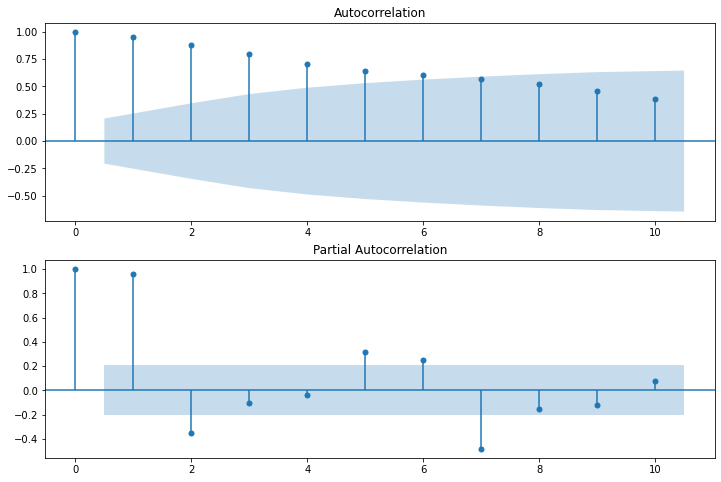

In [25]:
import statsmodels.api as sm


fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_month.Close, lags=10, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_month.Close, lags=10, ax=ax2)

According to the result of autocorrelation and partial autocorrelation, we are about to adopt AR model with p = 1

###### Manaul Parameter Search

* Akaike Information Criterion (AIC)
* Bayesian Information Criterion (BIC)

In [26]:
from sklearn.model_selection import learning_curve, train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [27]:
from statsmodels.tsa.arima.model import ARIMA

In [28]:
# parameter assignment
ps = list(range(0, 6))
qs = list(range(0, 6))
parameters_list = list(product(ps, qs))

In [29]:
result_aic = []
best_aic = float("inf")

##### Use Monthly Data

In [30]:
for p, q in parameters_list:
    try:
        model = ARIMA(training.Close, order=(p, 0, q)).fit()
    except ValueError:
        print('Parameter errors:', (p, q))
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = (p, q)
    result_aic.append([(p, q), aic])

c:\Users\WIN\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\WIN\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\Users\WIN\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\WIN\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\WIN\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\WIN\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to c

In [31]:
result_aic

[[(0, 0), 2152.759257316021],
 [(0, 1), 1754.3805860502607],
 [(0, 2), 1701.8706634295313],
 [(0, 3), 1640.053549834125],
 [(0, 4), 1629.6241012922603],
 [(0, 5), 1612.0589738075316],
 [(1, 0), 1628.0740323509299],
 [(1, 1), 1594.883562520859],
 [(1, 2), 1594.155594132114],
 [(1, 3), 1596.9366357693243],
 [(1, 4), 1595.287550071099],
 [(1, 5), 1600.3665007228644],
 [(2, 0), 1600.9256910468923],
 [(2, 1), 1594.9675477374376],
 [(2, 2), 1595.5559261242176],
 [(2, 3), 1596.437844103847],
 [(2, 4), 1595.6422685681316],
 [(2, 5), 1598.6269553246855],
 [(3, 0), 1592.150364162922],
 [(3, 1), 1594.1872509122268],
 [(3, 2), 1596.0408386482527],
 [(3, 3), 1597.337596656743],
 [(3, 4), 1598.9198152964714],
 [(3, 5), 1602.0016546437378],
 [(4, 0), 1594.186870096642],
 [(4, 1), 1595.0124401976236],
 [(4, 2), 1596.721997835887],
 [(4, 3), 1598.3870231875262],
 [(4, 4), 1601.3698883726763],
 [(4, 5), 1602.9609148668144],
 [(5, 0), 1595.5556610395784],
 [(5, 1), 1596.9272332433943],
 [(5, 2), 1598.682

In [32]:
result_table = pd.DataFrame(result_aic)
result_table.columns = ['parameters', 'aic']
print('The best model: ', best_model.summary())

The best model:                                 SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   85
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -791.075
Date:                Mon, 06 Jun 2022   AIC                           1592.150
Time:                        03:00:17   BIC                           1604.364
Sample:                    09-30-2014   HQIC                          1597.063
                         - 09-30-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9102.4531      2e+04      0.456      0.649   -3.01e+04    4.83e+04
ar.L1          1.7178      0.066     26.160      0.000       1.589       1.847
ar.L2         -1.1200      0.105   

In [45]:
# predicted price (contained in the training set)
predicted_size = 3
predicted_monthly_price = best_model.predict(start=str('2021-07-31'),end=str('2021-09-30'), dynamic=False)
predicted_monthly_price

Date
2021-07-31    31537.242975
2021-08-31    36903.453427
2021-09-30    53785.608884
Freq: M, Name: predicted_mean, dtype: float64

In [47]:
# actual montly price during the same period as that predicted
actual_predicted_montly_price = df_month.iloc[-predicted_size-testing_size: -testing_size].Close
actual_predicted_montly_price

Date
2021-07-31    34444.973790
2021-08-31    45709.022682
2021-09-30    45939.771484
Freq: M, Name: Close, dtype: float64

In [42]:
forecasted_size = 3
forecasted_monthly_close_price = best_model.forecast(3)
forecasted_monthly_close_price

2021-10-31    41032.717170
2021-11-30    36634.179005
2021-12-31    34662.163305
Freq: M, Name: predicted_mean, dtype: float64

In [48]:
actual_forecasted_monthly_close_price = df_month.iloc[-testing_size: -testing_size+forecasted_size].Close
actual_forecasted_monthly_close_price

Date
2021-10-31    57911.970514
2021-11-30    60621.488802
2021-12-31    49263.209174
Freq: M, Name: Close, dtype: float64

### Evaluate Result

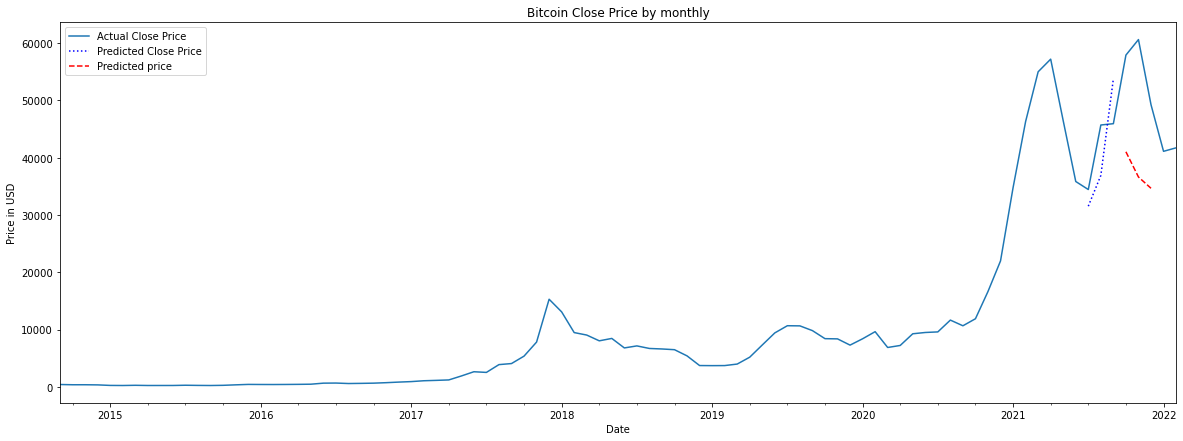

In [50]:
plt.figure(figsize=(20,7))
df_month.Close.plot(label='Actual Close Price')
predicted_monthly_price.plot(color='b', ls=':', label='Predicted Close Price')
forecasted_monthly_close_price.plot(color='r', ls='--', label='Predicted price')
plt.legend()
plt.title('Bitcoin Close Price by monthly')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.show()

In [ ]:
# use BIC as the critirion

In [33]:
results_bic_pd = pd.DataFrame(
    index=[f'AR({p})' for p in ps],
    columns=[f'MA({q})' for q in qs]
)

In [34]:
for p, q in parameters_list:
    if p==0 and q==0:
        results_bic_pd.loc[f'AR({p})', f'MA({q})'] = np.nan
        continue
    try:
        model = ARIMA(training.Close, order=(p, 0, q)).fit()
    except ValueError:
        print('Parameter errors:', (p, q))
        continue
    bic = model.bic
    results_bic_pd.loc[f'AR({p})', f'MA({q})'] = bic
results_bic_pd = results_bic_pd[results_bic_pd.columns].astype(float)

c:\Users\WIN\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\WIN\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\Users\WIN\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\WIN\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\WIN\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\WIN\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to c

In [35]:
results_bic_pd

,MA(0),MA(1),MA(2),MA(3),MA(4),MA(5)
AR(0),NaN,1761.708540,1711.641268,1652.266806,1644.280009,1629.157533
AR(1),1635.401986,1604.654168,1606.368850,1611.592543,1612.386109,1619.907711
AR(2),1610.696296,1607.180804,1610.211834,1613.536403,1615.183479,1620.610817
AR(3),1604.363620,1608.843158,1613.139397,1616.878807,1620.903677,1626.428167
AR(4),1608.842778,1612.110999,1616.263208,1620.370884,1625.796401,1629.830079
AR(5),1612.654220,1616.468443,1620.666040,1623.818552,1627.435522,1632.814173


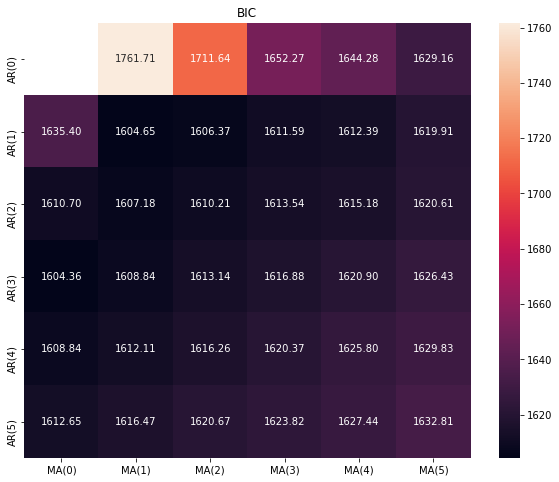

In [36]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(results_bic_pd,
                 mask=results_bic_pd.isnull(),
                 ax=ax,
                 annot=True,
                 fmt='.2f',
                 )
ax.set_title('BIC')
plt.show()

###### use function arma_order_select_ic to decide the optimized parameters

In [37]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)
                        

train_results = sm.tsa.arma_order_select_ic(training.Close, ic=['aic', 'bic'], trend='nc', max_ar=6, max_ma=6)
 
print('AIC', train_results.aic_min_order)
print('BIC', train_results.bic_min_order)

c:\Users\WIN\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


c:\Users\WIN\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.ari

AIC (3, 0)
BIC (3, 0)


In [51]:
# use MA(3)

In [52]:
model = ARIMA(training.Close, order=(0, 0, 3)).fit()

c:\Users\WIN\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



In [53]:
model.aic

1640.053549834125

In [54]:
model.bic

1652.2668061165766

In [55]:
predicted_monthly_price_ma3 = best_model.predict(start=str('2021-07-31'),end=str('2021-09-30'), dynamic=False)
forecasted_monthly_close_price_ma3 = best_model.forecast(3)

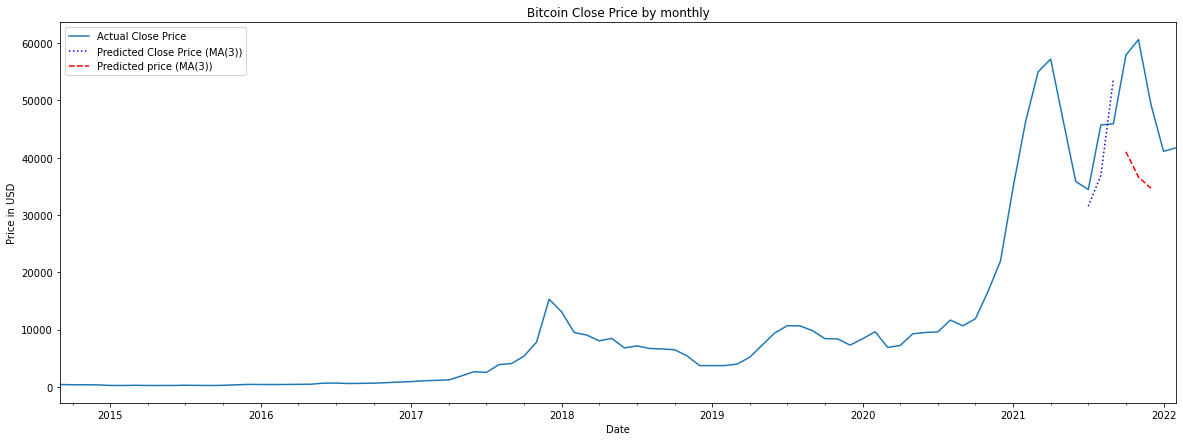

In [56]:
plt.figure(figsize=(20,7))
df_month.Close.plot(label='Actual Close Price')
predicted_monthly_price_ma3.plot(color='b', ls=':', label='Predicted Close Price (MA(3))')
forecasted_monthly_close_price_ma3.plot(color='r', ls='--', label='Predicted price (MA(3))')
plt.legend()
plt.title('Bitcoin Close Price by monthly')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.show()

In [57]:
print(predicted_monthly_price)
print(predicted_monthly_price_ma3)
print(forecasted_monthly_close_price)
print(forecasted_monthly_close_price_ma3)

Date
2021-07-31    31537.242975
2021-08-31    36903.453427
2021-09-30    53785.608884
Freq: M, Name: predicted_mean, dtype: float64
Date
2021-07-31    31537.242975
2021-08-31    36903.453427
2021-09-30    53785.608884
Freq: M, Name: predicted_mean, dtype: float64
2021-10-31    41032.717170
2021-11-30    36634.179005
2021-12-31    34662.163305
Freq: M, Name: predicted_mean, dtype: float64
2021-10-31    41032.717170
2021-11-30    36634.179005
2021-12-31    34662.163305
Freq: M, Name: predicted_mean, dtype: float64
